In [1]:
import numpy as np

In [2]:
from trabalho.modelos.bayesian_linear_regression_new import BayesianLinearRegressionNew

In [3]:
from trabalho.modelos.bayesian_polinomial_linear_regression_new import BayesianPolinomialLinearRegressionNew

In [4]:
from trabalho.modelos.bayesian_rbf_linear_regression import BayesianRBFLinearRegression

In [5]:
from IPython.display import Math
 
# Manipulação dos dados
import numpy as np
import pandas as pd
 
# Gráficos
import matplotlib as mpl
import matplotlib.pyplot as plt
 
import seaborn as sns
sns.set_theme()

In [6]:
# Ajustes nas configurações padrões dos plots
mpl.rcParams['figure.figsize'] = (10,6)
mpl.rcParams['font.size'] = 14
mpl.rcParams['legend.fontsize'] = 14

In [7]:
from io import StringIO

polynomial_regression_data = """x,y
6.964691855978616397e-01,-8.512708436871020412e-01
2.861393349503794648e-01,9.108640802938015035e-01
2.268514535642031094e-01,9.397306117796724312e-01
5.513147690828912317e-01,-3.237979358714317968e-01
7.194689697855630728e-01,-8.724512706668051676e-01
4.231064601244609591e-01,4.177759651763572335e-01
9.807641983846154821e-01,-1.530781416411577667e-01
6.848297385848632901e-01,-9.491341148698237973e-01
4.809319014843609352e-01,2.810486936010781478e-01
3.921175181941505272e-01,7.872412996284077202e-01
"""

dataset_2 = pd.read_csv(StringIO(polynomial_regression_data))
dataset_2

,x,y
0,0.696469,-0.851271
1,0.286139,0.910864
2,0.226851,0.939731
3,0.551315,-0.323798
4,0.719469,-0.872451
5,0.423106,0.417776
6,0.980764,-0.153078
7,0.684830,-0.949134
8,0.480932,0.281049
9,0.392118,0.787241


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:title={'center':'Scatter plot de `linear_regression_data.csv`'}, xlabel='x', ylabel='y'>

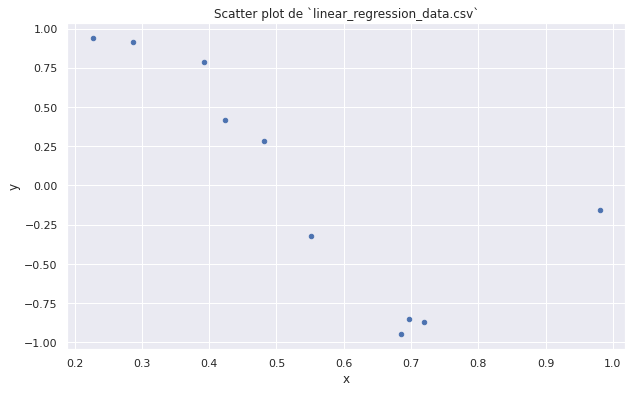

In [8]:
dataset_2.plot.scatter(x='x', y='y', title="Scatter plot de `linear_regression_data.csv`")

In [9]:
def plot_envelope(modelo, X, y, titulo, intervalo=(0, 1), ax=None):
    X_envelope = np.linspace(*intervalo, 100).reshape((-1, 1))
    y_envelope = modelo.phi(X_envelope) @ modelo.mu_post.reshape((-1, 1))

    μ, Σ = modelo.predict(X_envelope)
    σ = np.sqrt(np.diagonal(Σ).reshape((-1, 1)))

    ax = plt.axes() if ax is None else ax

    ax.scatter(X, y)
    ax.fill_between(
        X_envelope.flatten(),
        (y_envelope + 2*σ).flatten(),
        (y_envelope - 2*σ).flatten(),
        alpha=.1
    )

    ax.plot(X_envelope, y_envelope, 'orange')
    ax.plot(X_envelope, y_envelope + 2*σ, 'b')
    ax.plot(X_envelope, y_envelope - 2*σ, 'r')
    
    ax.set_title(titulo)
    ax.legend(['$y$', '$y + 2\sigma$', '$y - 2\sigma$'])
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')

In [10]:
X = dataset_2[['x']].to_numpy()
y = dataset_2[['y']].to_numpy()

N, D = X.shape

# Calculado a partir dos dados
m0 = None
S0 = None

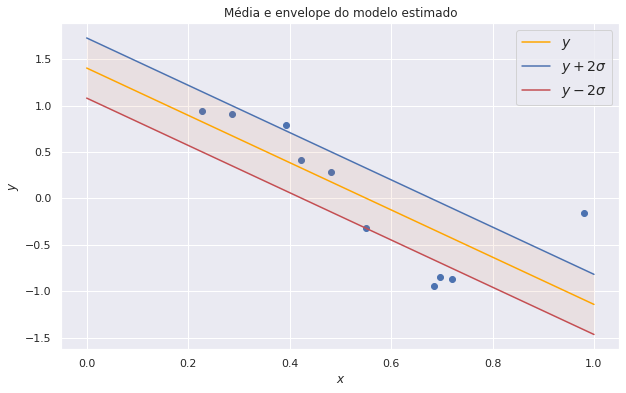

In [11]:
modelo = BayesianLinearRegressionNew(m0=m0, S0=S0, sig2_error=.0001)
modelo.fit(X, y)
plot_envelope(modelo, X, y, titulo='Média e envelope do modelo estimado')

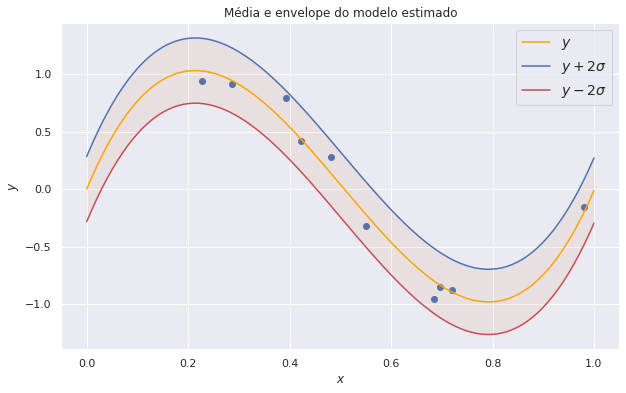

In [12]:
modelo = BayesianPolinomialLinearRegressionNew(m0=m0, S0=S0, sig2_error=1e-4, order=3)
modelo.fit(X, y)

plot_envelope(modelo, X, y, titulo='Média e envelope do modelo estimado')

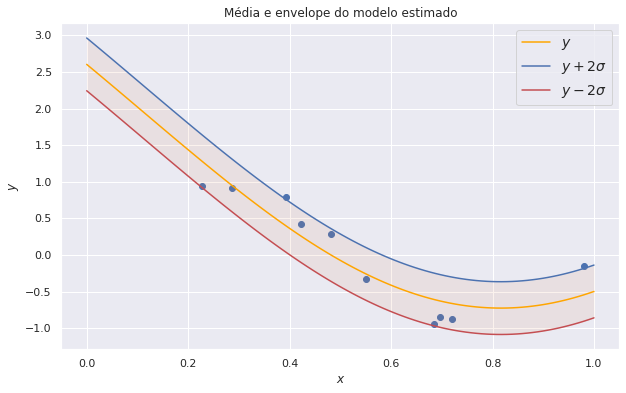

In [13]:
modelo = BayesianRBFLinearRegression(m0=m0, S0=S0, sig2_error=.0001, mean_rbf_arbitrario=0.5, lambda_rbf_arbitrario=0.5)
modelo.fit(X, y)

plot_envelope(modelo, X, y, titulo='Média e envelope do modelo estimado')